In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import os
import sys
import requests
import numpy as np
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline
#import geopandas as gpd

In [2]:
df = pd.read_csv('big table after missing values.csv', header=0, sep=',',thousands=',')
df=df.drop(['Unnamed: 0'],axis=1)
df

,countries,Year,CO2 Total Mt,CO2 Kg/1k$,CO2 Tons per capita,Generation GWh,consumption GWh,consumption per capita kW,installed capacity MW,Renewable installed capacity MW,Renewable generation GWh,Renewable percentage %,Population
0,france,2019,319.613,0.10,4.88,545014.0,449235.0,6673.1,137082.0,48533.0,116141.0,21.31,67320216
1,france,2018,327.585,0.11,5.02,551544.0,449957.0,6698.0,133531.0,45874.0,115984.0,21.03,67177636
2,france,2017,336.046,0.11,5.17,533956.0,455228.0,6791.8,133088.0,42864.0,95159.0,17.82,67026224
3,france,2016,331.913,0.11,5.13,536708.0,457729.0,6851.2,133151.0,39908.0,101197.0,18.86,66809816
4,france,2015,329.518,0.11,5.11,551038.0,450835.0,6765.4,132219.0,37827.0,94122.0,17.08,66638391
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,colombia,1994,59.064,0.18,1.60,40864.0,32026.0,894.2,12658.0,7902.0,32416.0,79.33,35817000
2302,colombia,1993,59.493,0.19,1.64,37584.0,29652.0,842.8,12185.0,7695.0,28113.0,74.80,35181000
2303,colombia,1992,56.230,0.19,1.58,32771.0,26624.0,771.2,11024.0,6794.0,22557.0,68.83,34522000
2304,colombia,1991,54.209,0.19,1.55,36374.0,28782.0,850.4,9599.0,6707.0,27479.0,75.55,33845000


In [3]:
#western developed
def getEUArr():
    EU_Arr=["france","uk","italy","spain",
        "portugal","poland","austria",
        "denmark","finland","greece",
        "hungary","ireland",
        "netherlands","romania",
        "sweden","iceland","belgium","norway","Switzerland",'turkey']
    return EU_Arr

def getWesternArr():
    westernC_Arr=["japan","australia","canada","south-korea","new-zealand",
              "usa","israel"]#8
    #westernC_Arr.extend(getEUArr())
    return westernC_Arr


superNationArr=["china","india"]#3

def getAfrica():
    AfricaC_Arr=["nigeria","ethiopia","democratic-republic-congo","tanzania","south-africa",
             "kenya","uganda","algeria","angola","mozambique",
             "ghana","madagascar","cameroon",
             "mali","malawi","zambia",
             "zimbabwe","guinea","rwanda",
             "burundi","togo",
             "congo","central-african-republic","mauritania",
             "gabon",
             "equatorial-guinea","mauritius",'mauritania','morocco','tunisia','algeria', 'egypt' ]#27
    return AfricaC_Arr

asian_arr=['iraq','iran''syria','jordan', 'lebanon',"nepal","Thailand","Malaysia","Philippines","Afghanistan",
           "Pakistan","china","india","south-korea","japan"]#6

AmericaC_Arr=["brazil","argentina","peru","chile","colombia",'canada','usa']#5


def get1world():
    OneWorldArr=["japan","australia","canada","south-korea","new-zealand",
              "usa","israel","france","uk","italy","spain",
        "portugal","austria",
        "denmark","finland","greece",
        "hungary","ireland",
        "netherlands",
        "sweden","iceland","belgium","norway","Switzerland"]
    return OneWorldArr

countriesArr=[]
#countriesArr.extend(getEUArr())
countriesArr.extend(getWesternArr())

countriesArr.extend(superNationArr)
countriesArr.extend(getAfrica())
#countriesArr.extend(other_asian_arr)
countriesArr.extend(AmericaC_Arr)
len(countriesArr)

48

# CO2 emission by years in Europe, Africa, Asia, America

Text(0.5, 1.0, 'America')

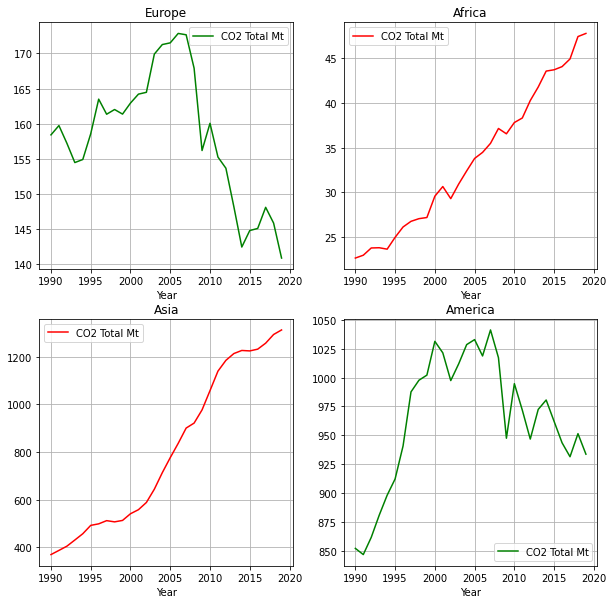

In [4]:
fig, axes = plt.subplots(2,2, figsize=(10,10))

ax = axes[0][0]
df2=df[df['countries'].isin(getEUArr())]
dfmean22 = df2.groupby(["Year"], as_index=False)['CO2 Total Mt'].mean()
dfmean22.plot( x='Year', y='CO2 Total Mt',ax=axes[0][0], grid=True, color='green')
ax.set_title('Europe')

ax = axes[0][1]
df3=df[df['countries'].isin(getAfrica())]
dfmean23 = df3.groupby(["Year"], as_index=False)['CO2 Total Mt'].mean()
dfmean23.plot( x='Year', y='CO2 Total Mt', ax=axes[0][1], grid=True, color='red')
ax.set_title('Africa')

ax = axes[1][0]
df4=df[df['countries'].isin(asian_arr)]
dfmean24 = df4.groupby(["Year"], as_index=False)['CO2 Total Mt'].mean()
dfmean24.plot( x='Year', y='CO2 Total Mt', ax=axes[1][0], grid=True, color='red')
ax.set_title('Asia')

ax = axes[1][1]
df5=df[df['countries'].isin(AmericaC_Arr)]
dfmean25 = df5.groupby(["Year"], as_index=False)['CO2 Total Mt'].mean()
dfmean25.plot( x='Year', y='CO2 Total Mt', ax=axes[1][1], grid=True, color='green')
ax.set_title('America')




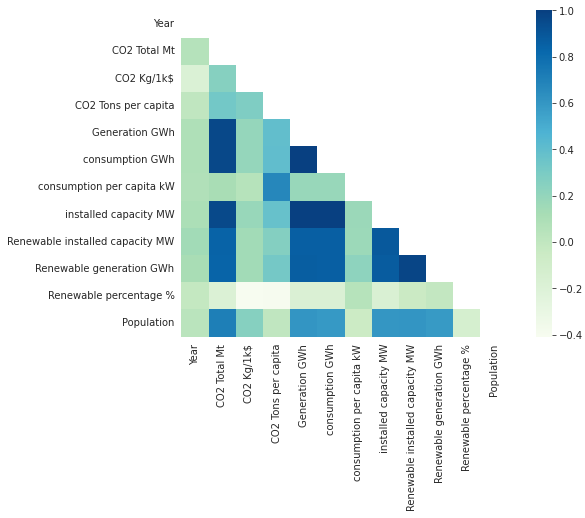

In [5]:
#fig, ax = plt.subplots(figsize=(10,6))
#sns.heatmap(df.corr(), cmap="GnBu")

mask= np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(10,6))
    ax= sns.heatmap(df.corr(),mask=mask,vmax=1,square=True ,cmap="GnBu")

#ax.set_title(‘Data Correlations’)

c:\users\raman\pycharmprojects\environmentpredict\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


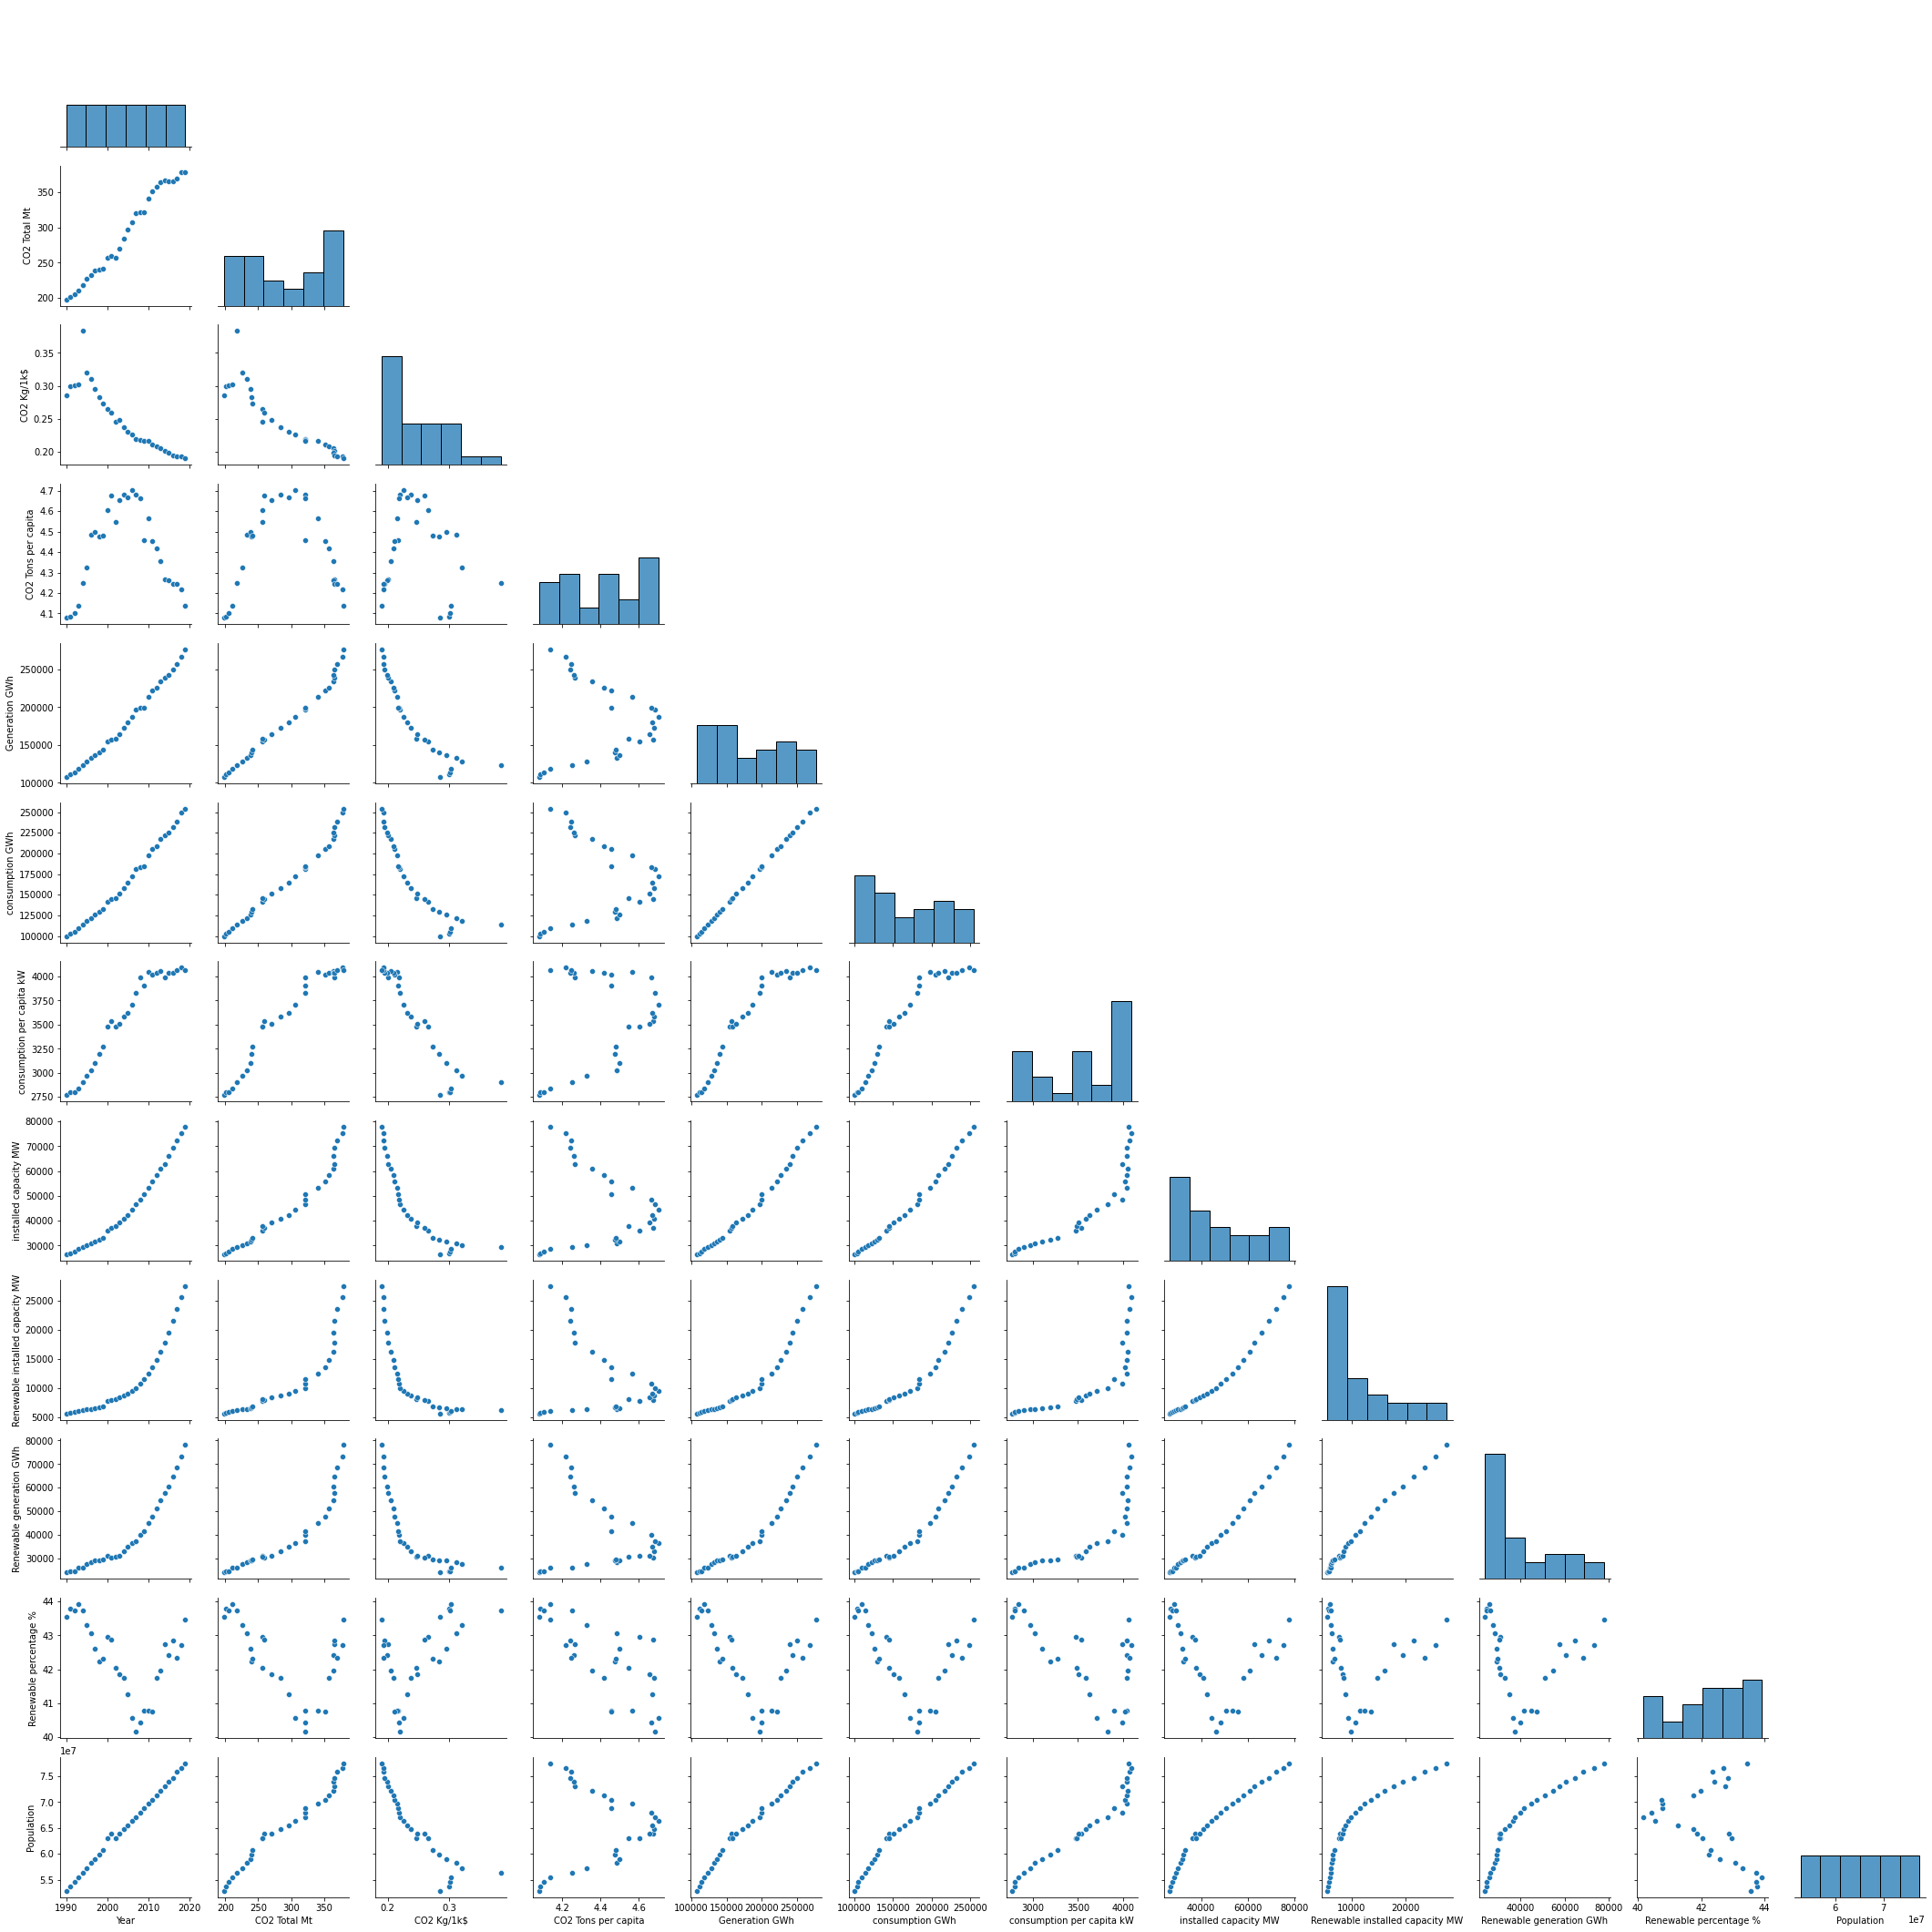

In [6]:
dfmean200 = df.groupby(["Year"], as_index=False)['CO2 Total Mt','CO2 Kg/1k$',
                                                'CO2 Tons per capita',
                                                 'Generation GWh',
                                                 'consumption GWh',
                                                 'consumption per capita kW',
                                                'installed capacity MW',
                                                 'Renewable installed capacity MW',
                                                'Renewable generation GWh',
                                                 'Renewable percentage %',
                                                 'Population'].mean()
sns.pairplot(dfmean200, corner=True)


# CO2 emission vs energy consumption and population

c:\users\raman\pycharmprojects\environmentpredict\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
c:\users\raman\pycharmprojects\environmentpredict\venv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


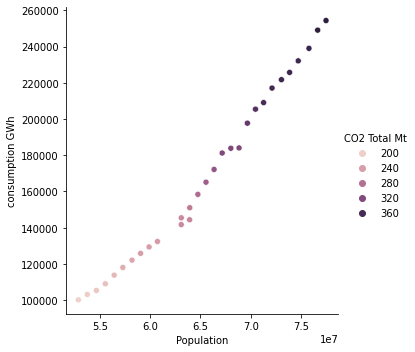

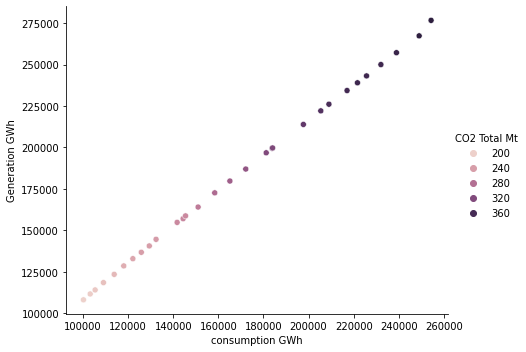

In [7]:
df2 =df.groupby(["Year"], as_index=False)['Population','consumption GWh','CO2 Total Mt'].mean()
sns.relplot(x='Population',y='consumption GWh',hue='CO2 Total Mt',data=df2 )

df3 =df.groupby(["Year"], as_index=False)['Generation GWh','consumption GWh','CO2 Total Mt'].mean()
sns.relplot(x='consumption GWh',y='Generation GWh',hue='CO2 Total Mt',data=df3,aspect=1.3 )

Text(0.5, 1.0, 'America')

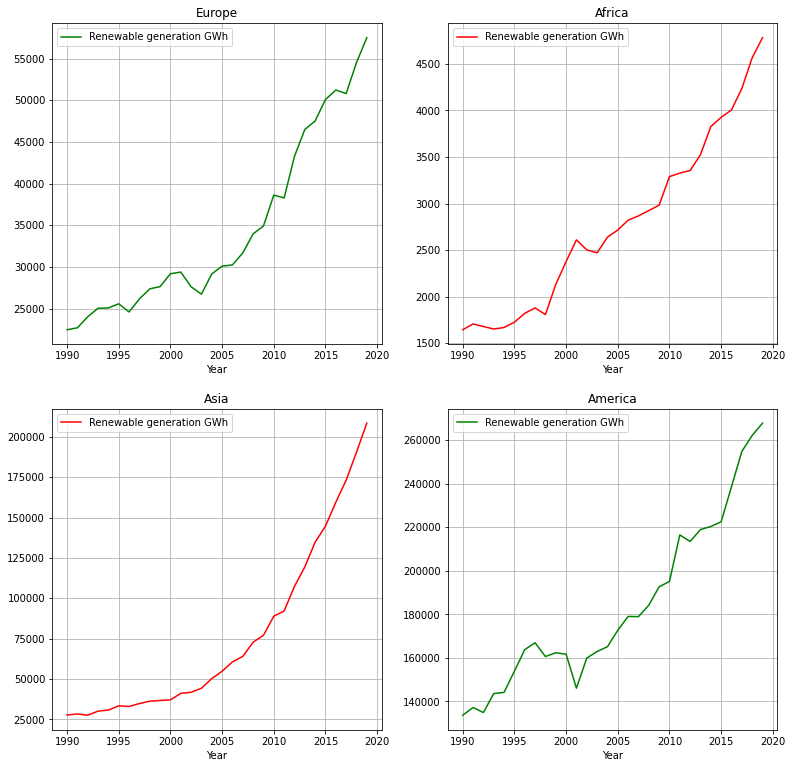

In [8]:
fig, axes = plt.subplots(2,2, figsize=(13,13))

ax = axes[0][0]
df2=df[df['countries'].isin(getEUArr())]
dfmean22 = df2.groupby(["Year"], as_index=False)['Renewable generation GWh'].mean()
dfmean22.plot( x='Year', y='Renewable generation GWh',ax=axes[0][0], grid=True, color='green')
ax.set_title('Europe')

#ax = axes[0][1]
#df2=df[df['countries'].isin(getEUArr())]
#dfmean22 = df2.groupby(["Year"], as_index=False)['CO2 Total Mt','Generation GWh'].mean()
#dfmean22.plot( x='Generation GWh', y='CO2 Total Mt',ax=axes[0][1], grid=True, color='green')
#ax.set_title('Europe')

ax = axes[0][1]
df3=df[df['countries'].isin(getAfrica())]
dfmean23 = df3.groupby(["Year"], as_index=False)['Renewable generation GWh'].mean()
dfmean23.plot( x='Year', y='Renewable generation GWh', ax=axes[0][1], grid=True, color='red')
ax.set_title('Africa')

ax = axes[1][0]
df4=df[df['countries'].isin(asian_arr)]
dfmean24 = df4.groupby(["Year"], as_index=False)['Renewable generation GWh'].mean()
dfmean24.plot( x='Year', y='Renewable generation GWh', ax=axes[1][0], grid=True, color='red')
ax.set_title('Asia')

ax = axes[1][1]
df5=df[df['countries'].isin(AmericaC_Arr)]
dfmean25 = df5.groupby(["Year"], as_index=False)['Renewable generation GWh'].mean()
dfmean25.plot( x='Year', y='Renewable generation GWh', ax=axes[1][1], grid=True, color='green')
ax.set_title('America')

c:\users\raman\pycharmprojects\environmentpredict\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='Year'>

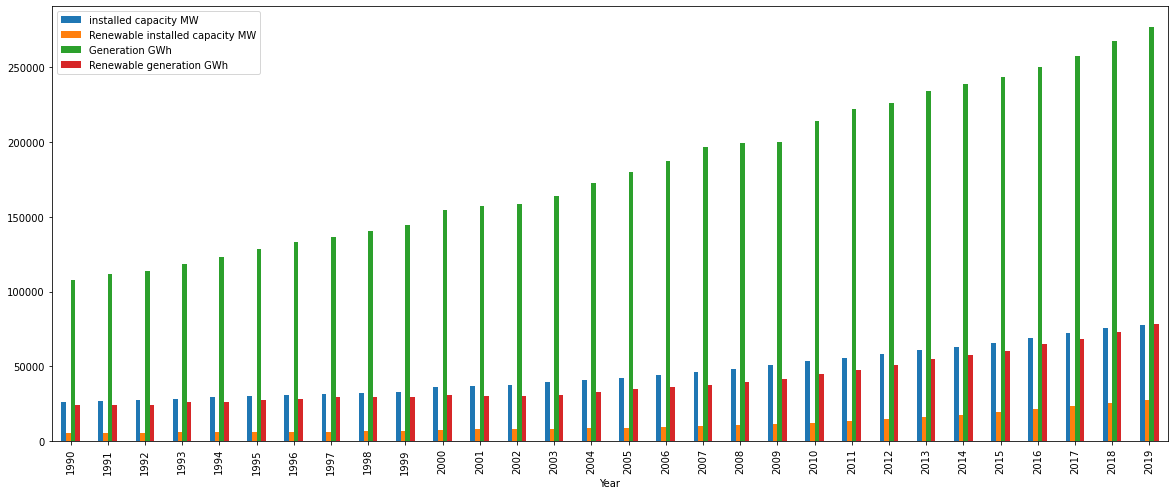

In [9]:
dfmean1 =df.groupby(["Year"], as_index=False)['installed capacity MW','Renewable installed capacity MW','Generation GWh','Renewable generation GWh'].mean()
dfmean1.plot(x='Year',kind="bar",figsize=(20,8))

c:\users\raman\pycharmprojects\environmentpredict\venv\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """
c:\users\raman\pycharmprojects\environmentpredict\venv\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  # This is added back by InteractiveShellApp.init_path()


Text(0.5, 1.0, 'Devoloping Countries')

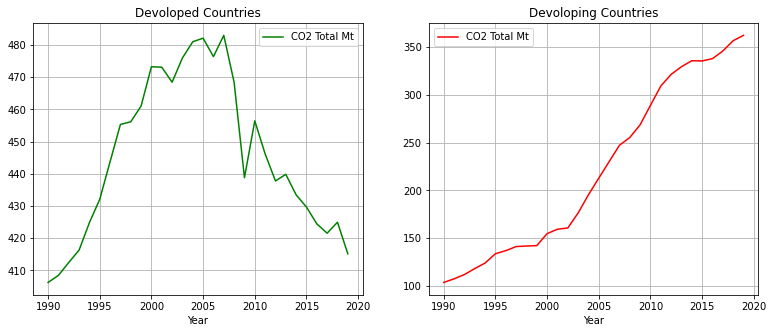

In [10]:
fig, axes = plt.subplots(1,2, figsize=(13,5))

ax=axes[0]
df2=df[df['countries'].isin(get1world())]
dfmean22 = df2.groupby(["Year"], as_index=True)['Year','CO2 Total Mt'].mean()
dfmean22.plot(x='Year', y='CO2 Total Mt', ax=axes[0], grid=True, c='g')
ax.set_title('Devoloped Countries')

ax=axes[1]
df2=df[-df['countries'].isin(get1world())]
dfmean22 = df2.groupby(["Year"], as_index=True)['Year','CO2 Total Mt'].mean()
dfmean22.plot(x='Year', y='CO2 Total Mt', ax=axes[1], grid=True, c='r')
ax.set_title('Devoloping Countries')





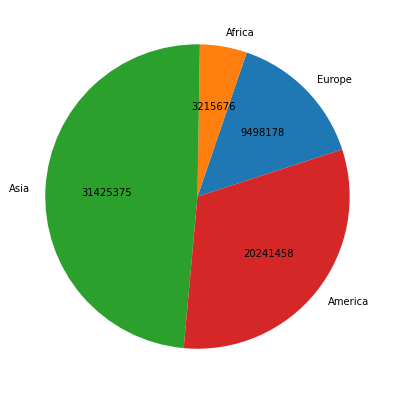

In [11]:
df2=df[df['countries'].isin(getEUArr())]
dfmean22 = df2.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
euCO2Total=dfmean22['CO2 Total Mt'].sum()

df3=df[df['countries'].isin(getAfrica())]
dfmean23 = df3.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
africaCO2Total=dfmean23['CO2 Total Mt'].sum()

df4=df[df['countries'].isin(asian_arr)]
dfmean24 = df4.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
asiaCO2Total=dfmean24['CO2 Total Mt'].sum()

df5=df[df['countries'].isin(AmericaC_Arr)]
dfmean25 = df5.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
americaCO2Total=dfmean25['CO2 Total Mt'].sum()

arr1=["Europe","Africa","Asia","America"]
arr=[euCO2Total,africaCO2Total,asiaCO2Total,americaCO2Total]
total =0
for i in arr:
    total=total+i
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(arr, labels = arr1,autopct=lambda p: '{:.0f}'.format(p* total), startangle=18)
ax.set_title('sum of')
# show plot
plt.show()

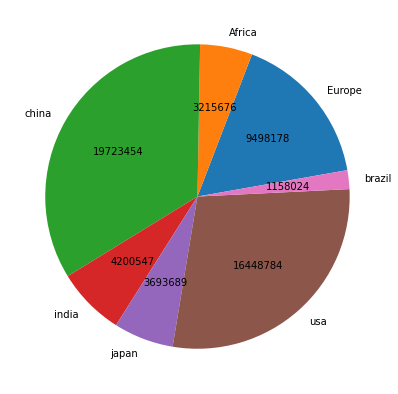

In [32]:
df2=df[df['countries'].isin(getEUArr())]
dfmean32 = df2.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
euCO2Total=dfmean32['CO2 Total Mt'].sum()

df3=df[df['countries'].isin(getAfrica())]
dfmean33 = df3.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
africaCO2Total=dfmean33['CO2 Total Mt'].sum()

df4=df[df['countries']=='china']
dfmean34 = df4.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
asiaCO2Total=dfmean34['CO2 Total Mt'].sum()

df5=df[df['countries']=='usa']
dfmean35 = df5.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
americaCO2Total=dfmean35['CO2 Total Mt'].sum()

df6=df[df['countries']=='india']
dfmean36 = df6.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
indiaCO2Total=dfmean36['CO2 Total Mt'].sum()

df7=df[df['countries']=='brazil']
dfmean37 = df7.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
brazilCO2Total=dfmean37['CO2 Total Mt'].sum()

df8=df[df['countries']=='japan']
dfmean38 = df8.groupby(["Year"], as_index=False)['CO2 Total Mt'].sum()
japanCO2Total=dfmean38['CO2 Total Mt'].sum()
total =0
for i in arr:
    total=total+i
arr1=["Europe","Africa","china","india","japan","usa","brazil"]
arr=[euCO2Total,africaCO2Total,asiaCO2Total,indiaCO2Total,japanCO2Total,americaCO2Total,brazilCO2Total]

# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(arr, labels = arr1,autopct=lambda p: '{:.0f}'.format(p*total), startangle=10)
ax.set_title('sum of')
# show plot
plt.show()